<h4>Machine Learning</h4>

<i>Linear Regression</i>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv(r"C:\Users\Tina Almeida\Documents\S_EXCELR\Datascience\Datasets\Advertising.csv",index_col=0)

In [12]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<h3> Data Preprocessing</h3>

Text(0.5, 1.0, 'Sales vs Revenue from TV')

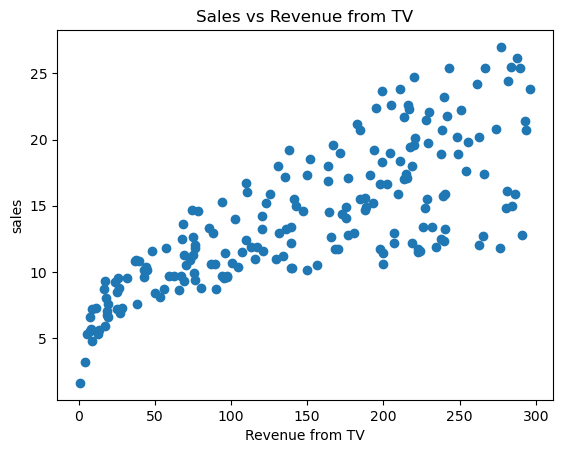

In [10]:
x=data["TV"]
y=data["sales"]
plt.scatter(x,y)
plt.xlabel("Revenue from TV")
plt.ylabel("sales")
plt.title("Sales vs Revenue from TV")

Text(0.5, 1.0, 'Sales vs Revenue from newspaper')

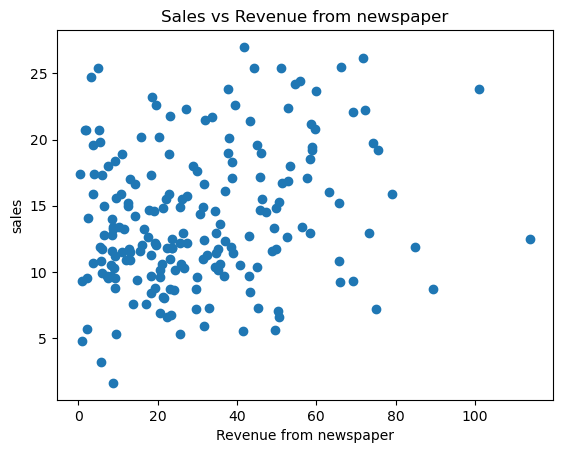

In [9]:
x=data["newspaper"]
y=data["sales"]
plt.scatter(x,y)
plt.xlabel("Revenue from newspaper")
plt.ylabel("sales")
plt.title("Sales vs Revenue from newspaper")

Text(0.5, 1.0, 'Sales vs Revenue from radio')

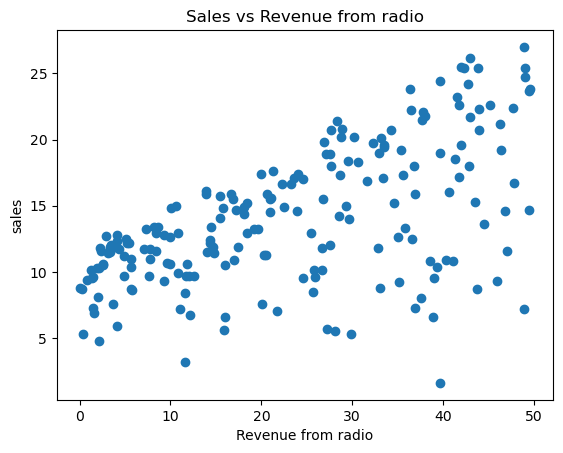

In [13]:
x=data["radio"]
y=data["sales"]
plt.scatter(x,y)
plt.xlabel("Revenue from radio")
plt.ylabel("sales")
plt.title("Sales vs Revenue from radio")

<Axes: >

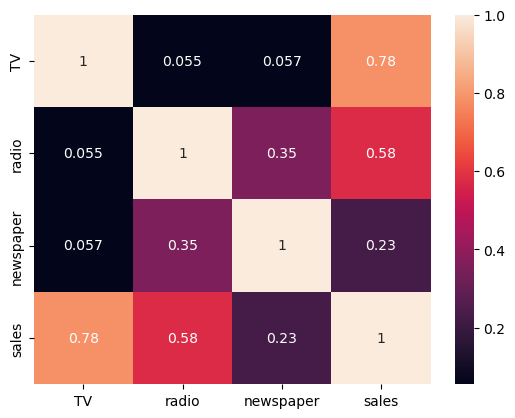

In [17]:
sns.heatmap(data.corr(),annot=True)

In [22]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x19e5baaec20>,
 'caps': [<matplotlib.lines.Line2D at 0x19e5baaf160>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e5baae950>],
 'medians': [<matplotlib.lines.Line2D at 0x19e5baaf6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e5baaf940>],
 'means': []}

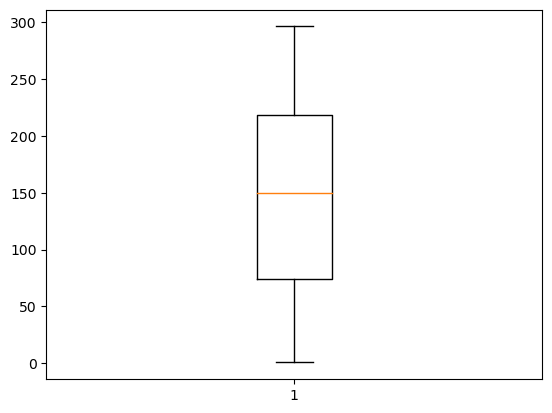

In [19]:
plt.boxplot(data["TV"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19e5b8e6320>,
 'caps': [<matplotlib.lines.Line2D at 0x19e5b8e6860>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e5b8e6080>],
 'medians': [<matplotlib.lines.Line2D at 0x19e5b8e6da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e5b8e7040>],
 'means': []}

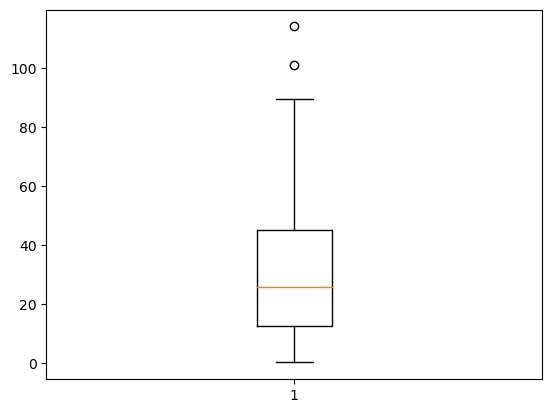

In [20]:
plt.boxplot(data["newspaper"])

<h4>Linear Regression : y=b0+b1x1</h4>

In [25]:
x=data[["TV","newspaper","radio"]]
y=data["sales"]
x

,TV,newspaper,radio
1,230.1,69.2,37.8
2,44.5,45.1,39.3
3,17.2,69.3,45.9
4,151.5,58.5,41.3
5,180.8,58.4,10.8
...,...,...,...
196,38.2,13.8,3.7
197,94.2,8.1,4.9
198,177.0,6.4,9.3
199,283.6,66.2,42.0


In [26]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [29]:
print("shape of x: ",x.shape)
print("shape of y: ",y.shape)


shape of x:  (200, 3)
shape of y:  (200,)


In [27]:
import sklearn

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20)

In [31]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (160, 3)
x_test:  (40, 3)
y_train:  (160,)
y_test:  (40,)


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
model=lr.fit(x_train,y_train)

In [36]:
print(lr.coef_)

[ 0.04602387 -0.00206326  0.18477626]


In [37]:
print(lr.intercept_)

2.999381570103367


In [38]:
# y=b0+b1x1+b2x2+b3x3
b0=2.999381570103367
b1=0.04602387 
b2=-0.00206326
b3=0.18477626

In [40]:
#here we are predicting the y value from the dataset
y=b0+b1*57.5+b2*32.8+b3*23.5
y

9.920321277103367

In [43]:
y_pred=lr.predict(x_test)
y_pred

array([16.43029785, 15.15551913, 15.17479424, 15.47102042,  8.40756347,
       13.45689805, 10.29061677,  3.62338514, 11.09844803, 10.01990892,
       18.42933755,  9.94351429, 17.11856423, 12.69636738, 16.24486197,
       19.9700686 , 13.92687664, 11.40312027, 11.55933745, 23.6757647 ,
        7.64728412, 15.52184162, 12.21609741, 20.58241089, 13.78208245,
       12.72824107,  9.13958398,  9.78903543,  5.78705704, 22.18587349,
       11.99538462, 14.78848517, 12.17021892, 20.4312378 , 19.20401807,
       16.11027122, 19.21237874, 22.80250342, 14.21960649, 13.17807846])

In [51]:
new_df=pd.DataFrame()
new_df=x_test
new_df['actual sales']=y_test
new_df['predicted sales']=y_pred
new_df


,TV,newspaper,radio,actual sales,predicted sales
114,209.6,10.7,20.6,15.9,16.430298
86,193.2,65.7,18.4,15.2,15.155519
115,78.2,34.5,46.8,14.6,15.174794
38,74.7,45.7,49.4,14.7,15.471020
133,8.4,2.1,27.2,5.7,8.407563
162,85.7,49.3,35.8,13.3,13.456898
73,26.8,19.3,33.0,8.8,10.290617
109,13.1,25.6,0.4,5.3,3.623385
165,117.2,5.4,14.7,11.9,11.098448
152,121.0,48.7,8.4,11.6,10.019909


In [52]:
new_df.to_csv("Sales_prediction results.csv")

In [53]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#calculating r squared error
r2 = r2_score(y_test,y_pred)
print("R-squared: ", r2*100,"\n")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root mean sqaured error : ", rmse)

R-squared:  89.57438478638973 

Root mean sqaured error :  1.5923087220318601
